In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
#%pylab inline
import datetime

matplotlib.interactive(True)

In [2]:
path_to_file40Hz = "/media/sf_VBox_Shared/London/accelerometer_40Hz/__016563_2014-08-08 12-02-19.bin_day1.RData.csv"
day1_40Hz = pd.read_csv(path_to_file40Hz)
path_to_file5sec = "/media/sf_VBox_Shared/London/accelerometer_5second/__016563_2014-08-08 12-02-19.bin_day1.csv"
day1_5sec = pd.read_csv(path_to_file5sec)

In [3]:
day1_40Hz.head()

,Gx,Gy,Gz
0,0.459432,0.651919,-0.611590
1,0.471297,0.632170,-0.635435
2,0.467342,0.644020,-0.643383
3,0.463387,0.655869,-0.619538
4,0.455478,0.651919,-0.623512


In [4]:
day1_40Hz.describe()

,Gx,Gy,Gz
count,3.456000e+06,3.456000e+06,3.456000e+06
mean,-2.787586e-01,8.501921e-02,-1.914466e-01
std,5.353071e-01,4.880666e-01,6.429143e-01
min,-8.076708e+00,-8.084580e+00,-8.094005e+00
25%,-6.745605e-01,-1.917690e-01,-7.720124e-01
50%,-3.905720e-01,7.734796e-02,-3.128317e-01
75%,1.015340e-01,4.445791e-01,3.608886e-01
max,8.119701e+00,8.090655e+00,8.184759e+00


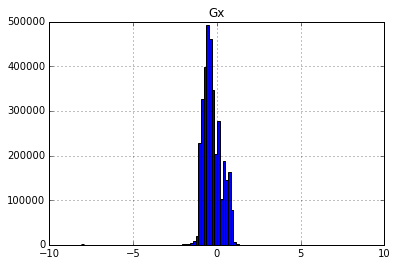

In [5]:
day1_40Hz.hist('Gx', bins=100)
plt.show()

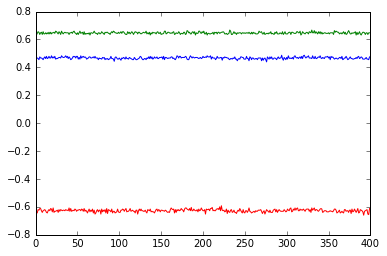

In [6]:
plt.plot(day1_40Hz[1:400])
plt.show()

In [7]:
a_x = day1_40Hz['Gx']
a_y = day1_40Hz['Gy']
a_z = day1_40Hz['Gz']

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_x[:500], a_y[:500], a_z[:500], color='black', s=5);

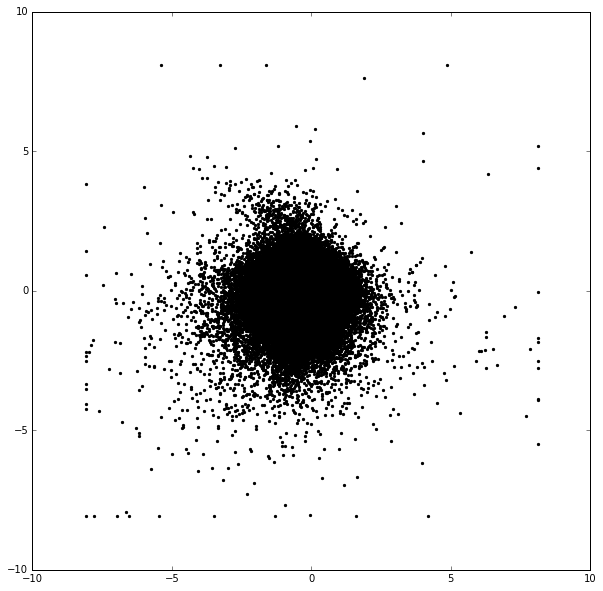

In [10]:
fig = subplots(figsize=(10, 10))
nmax = len(day1_40Hz)
plt.scatter(a_x[:nmax], a_y[:nmax], color='black', s=5);

In [8]:
radtodegree = 180/np.pi
theta_r = np.tanh(a_x/np.sqrt(a_y**2 + a_z**2))
psi_r = np.tanh(a_y/np.sqrt(a_x**2 + a_z**2))
phi_r = np.tanh(a_z/np.sqrt(a_x**2 + a_y**2))
theta = theta_r*radtodegree
psi = psi_r*radtodegree
phi = phi_r*radtodegree

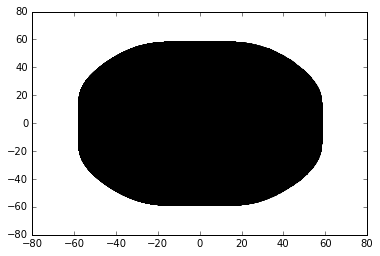

In [12]:
plt.scatter(theta[:nmax], psi[:nmax], color='black', s=5);

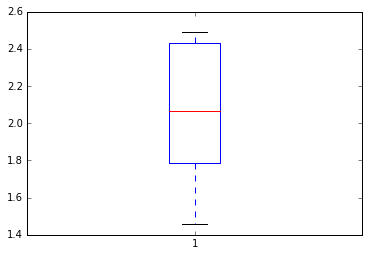

In [9]:
rad = np.tan(theta/radtodegree)**2 + np.tan(psi/radtodegree)**2 + np.tan(phi/radtodegree)**2
plt.boxplot(rad);

In [10]:
size = np.sqrt(a_x**2 + a_y**2 + a_z**2)
pos_x = a_x/size
pos_y = a_y/size
pos_z = a_z/size

In [ ]:
tan_theta 

In [11]:
x = np.sin(theta_r) #*np.cos(psi_r)
y = np.sin(psi_r)
z = np.tan(phi_r)**2 * np.sqrt(x**2 + y**2)#- np.cos(phi_r) 

In [57]:
for a in x, y, z:
    for b in pos_x, pos_y, pos_z:
        print(np.corrcoef(a,b)[1,0])
    print('')

0.998085623221
0.0632981909588
0.0576328213414

-0.0718446929206
-0.998700507404
0.18004352784

-0.334123615539
-0.0350413637403
0.193032782911



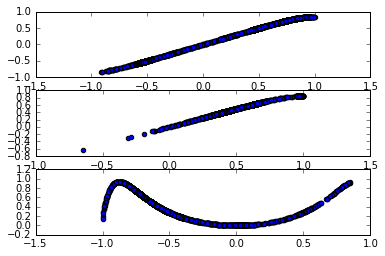

In [67]:
fig, axes = plt.subplots(3)
nmax=100000
axes[0].scatter(pos_x[:nmax], x[:nmax])
axes[1].scatter(pos_y[:nmax], y[:nmax])
axes[2].scatter(pos_z[:nmax], z[:nmax])

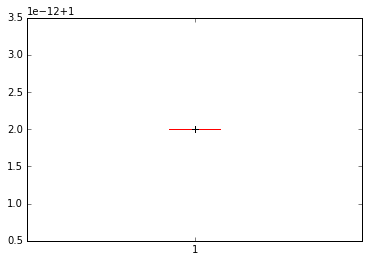

In [50]:
plt.boxplot(pos_x**2 + pos_y**2 + pos_z**2);

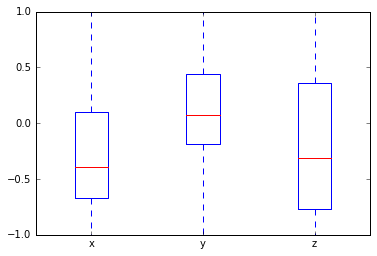

In [13]:
plt.boxplot([pos_x, pos_y, pos_z], labels=['x', 'y', 'z']);

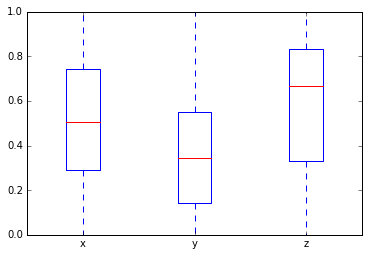

In [14]:
plt.boxplot([np.abs(pos_x), np.abs(pos_y), np.abs(pos_z)], labels=['x', 'y', 'z']);